In [7]:
import os
import pandas as pd
from anndata import read_h5ad
import scanpy as sc
import scregseg
import matplotlib.pyplot as plt
from scregseg.visualize import plot_fragmentsize
from matplotlib import cm

In [8]:
def plot_scregseg(model_path, count_matrix_path, use_batch=True):
    model = scregseg.Scregseg.load(os.path.join(model_path, 'dirmulhmm'))
    fig, ax =  plt.subplots(figsize=(4,7))
    model.plot_state_frequency(ax=ax)
    plt.tight_layout()
    plt.show()
    fig, ax =  plt.subplots(figsize=(4,7))
    model.plot_readdepth(ax=ax)
    plt.tight_layout()
    plt.show()
    adata = read_h5ad(count_matrix_path)
    # https://stackoverflow.com/questions/48173798/additional-row-colors-in-seaborn-cluster-map
    # https://seaborn.pydata.org/generated/seaborn.clustermap.html
    # https://gist.github.com/jdbcode/33d37999f950a36b43e058d15280b536
    if "batch" in adata.var.columns and use_batch:
        cmap1 = cm.get_cmap('Set3', len(adata.var.batch.unique()))  
        cmap_list1 = [cmap1(i) for i in range(cmap1.N)] 
        mapping1 = dict(zip(adata.var.batch.unique(), cmap_list1))
        col_cols1 = adata.var["batch"].astype(str).map(mapping1)
        adata.var["condition"] = adata.var["batch"].apply(lambda x: x.split("_")[-1])
        cmap2 = cm.get_cmap('Set3', len(adata.var["condition"].unique()))  
        cmap_list2 = [cmap2(i) for i in range(cmap2.N)] 
        mapping2 = dict(zip(adata.var["condition"].unique(), cmap_list2))
        col_cols2 = adata.var["condition"].astype(str).map(mapping2)
        col_colors = pd.concat([col_cols1,col_cols2],axis=1)
        # Function takes **kwargs and seaborn.clustermap is called internally
        _ = model.plot_cell_state_association(adata, col_colors=col_colors)
    else:
        _ = model.plot_cell_state_association(adata)
    plt.show()
    
    
    if "batch" in adata.var.columns and use_batch:
        cmap1 = cm.get_cmap('Set3', len(adata.var.batch.unique()))  
        cmap_list1 = [cmap1(i) for i in range(cmap1.N)] 
        mapping1 = dict(zip(adata.var.batch.unique(), cmap_list1))
        col_cols1 = adata.var["batch"].astype(str).map(mapping1)
        adata.var["condition"] = adata.var["batch"].apply(lambda x: x.split("_")[-1])
        cmap2 = cm.get_cmap('Set3', len(adata.var["condition"].unique()))  
        cmap_list2 = [cmap2(i) for i in range(cmap2.N)] 
        mapping2 = dict(zip(adata.var["condition"].unique(), cmap_list2))
        col_cols2 = adata.var["condition"].astype(str).map(mapping2)
        col_colors = pd.concat([col_cols1,col_cols2],axis=1)
        # Function takes **kwargs and seaborn.clustermap is called internally
        _ = model.plot_emissions(col_colors=col_colors)
    else:
        _ = model.plot_emissions()
    plt.show()
    
    
    fig, axes=plt.subplots(2, figsize=(7,14))
    plot_fragmentsize(adata, ax=axes[0])
    model.plot_fragmentsize(adata, ax=axes[1], cmap="Blues")
    plt.tight_layout()
    plt.show()

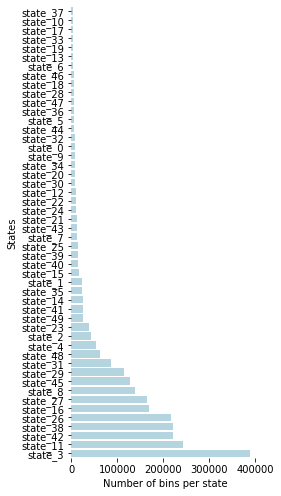

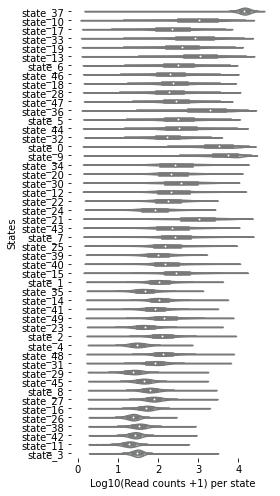

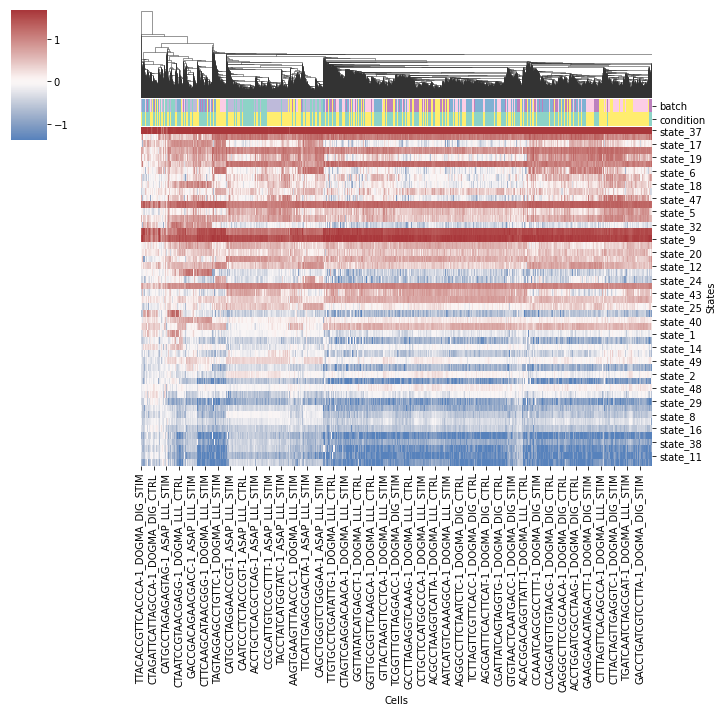

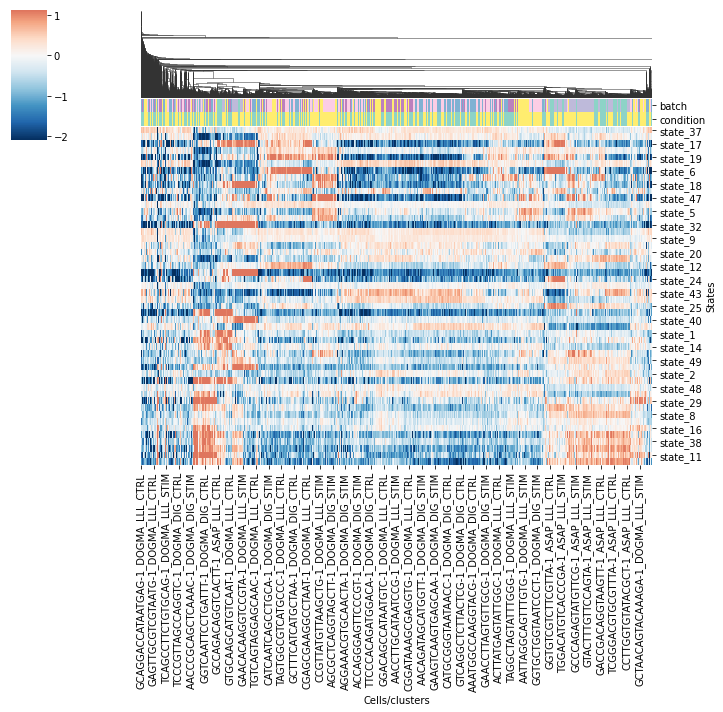

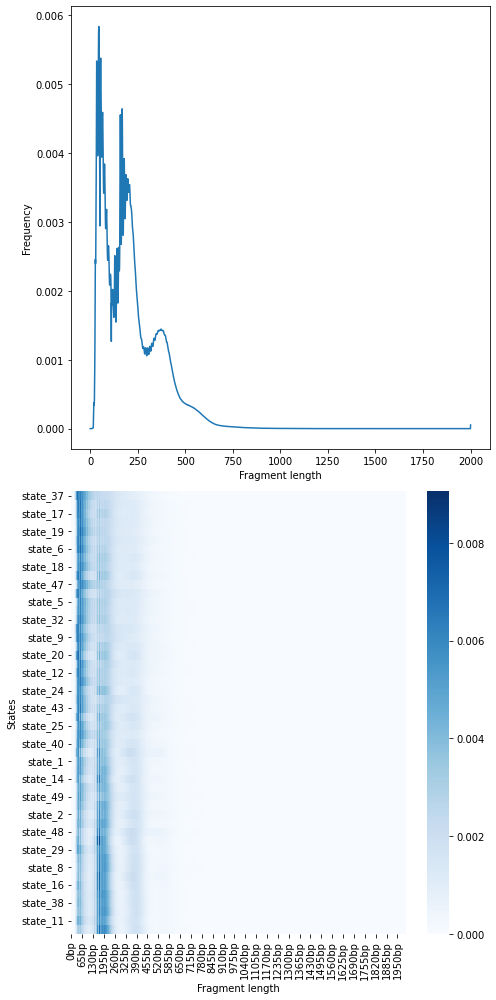

In [10]:
plot_scregseg("./../../data/derived/Mimitou2021/ATAC/scregseg_fi_all_samples_50_states/",
                      "./../../data/derived/Mimitou2021/ATAC/all_datasets_input_scregseg_second_pass.h5ad", use_batch=True)

In [ ]:
# State abundance across genome

In [1]:
import os
import pandas as pd
from anndata import read_h5ad
import scanpy as sc
import scregseg
import matplotlib.pyplot as plt
from scregseg.visualize import plot_fragmentsize
from matplotlib import cm

/home/prauten/miniconda3/envs/lpr_scregseg/lib/python3.7/site-packages/numpydoc/docscrape.py:418: UserWarning: Unknown section Return
  warn(msg)


In [15]:
def print_state_genome_cov(model_path):  
    model = scregseg.Scregseg.load(os.path.join(model_path, 'dirmulhmm'))
    state_prob_dict = {}
    for i, p in enumerate(model.model.get_stationary_distribution()):
        # print('state_{}, p_{}'.format(i, p))
        state_prob_dict['state_{}'.format(i)] = p
    sorted_state_prob_dict = dict(sorted(state_prob_dict.items(), key=lambda item: item[1]))
    # print(sorted_state_prob_dict)
    return sorted_state_prob_dict

In [20]:
1/50

0.02

In [17]:
print_state_genome_cov("./../../data/derived/Mimitou2021/ATAC/scregseg_fi_all_samples_50_states/")

{'state_37': 0.0014285129991629603,
 'state_10': 0.0015308762791957139,
 'state_17': 0.001582325046874738,
 'state_33': 0.0016559447011099322,
 'state_19': 0.001835638765397673,
 'state_6': 0.0018449141864011888,
 'state_13': 0.0018984221589394483,
 'state_46': 0.0021714975063117526,
 'state_18': 0.0023328183616846505,
 'state_28': 0.002382006885541267,
 'state_47': 0.0025285411029706186,
 'state_5': 0.0026295619633342027,
 'state_44': 0.0026514359670069924,
 'state_36': 0.002746719291524534,
 'state_32': 0.0028686958639754213,
 'state_34': 0.00336154140485051,
 'state_0': 0.0034005843516282295,
 'state_20': 0.00341808301340009,
 'state_9': 0.003436883146251816,
 'state_30': 0.003593269930170466,
 'state_12': 0.0036696860677832475,
 'state_22': 0.003734352218068226,
 'state_24': 0.003924146598553021,
 'state_43': 0.004799197004748412,
 'state_21': 0.0049816349289257345,
 'state_7': 0.005218183684042257,
 'state_25': 0.005391553734924587,
 'state_39': 0.005542673976420419,
 'state_40': 

In [ ]:
# Threshold max 1.5% of genome covered - Until state 23! 